In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!touch "/content/drive/MyDrive/Quasar/data_types.py" as data_types

In [3]:
!touch "/content/drive/MyDrive/Quasar/utility_functions.py" as utility_functions

In [33]:
import sys
import scipy.stats as stat
import numpy as np
from pylab import*
from sympy import sympify
from matplotlib.backends.backend_pdf import PdfPages
#%matplotlib inline
from scipy import*
from astropy import*
from scipy.stats import ks_2samp
from astropy import constants as const
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import stats
#from utility_functions import read_spectra, append_row_to_csv, clear_file, print_to_file, read_list_spectra
import os
from os.path import exists
import csv
import pandas as pd
import re

In [34]:
!touch "/content/drive/MyDrive/Quasar/DR16Q/Rankine20_CIV_BAL.fits"
!touch "/content/drive/MyDrive/Quasar/DR16Q/DR16Q_v4.fits"
!touch "/content/drive/MyDrive/Quasar/DR16Q/dr14q_spec_prop.fits"
!touch "/content/drive/MyDrive/Quasar/DR16Q/CROSS_CORRELATION/DR16parent_DR14RankineInfo.csv"
!touch "/content/drive/MyDrive/Quasar/DR16Q/CROSS_CORRELATION/DR16EHVO_DR14RankineInfo.csv"
!touch "/content/drive/MyDrive/Quasar/DR16Q/DR9parent_DR14RankineInfo.csv"
!touch "/content/drive/MyDrive/Quasar/DR16Q/DR9EHVO_DR14RankineInfo.csv"
!touch "/content/drive/MyDrive/Quasar/DR16_parent_sample.csv"

In [35]:
rankineAll = "/content/drive/MyDrive/Quasar/DR16Q/Rankine20_CIV_BAL.fits"
infoDR16 = "/content/drive/MyDrive/Quasar/DR16Q/DR16Q_v4.fits"
infoDR14 = "/content/drive/MyDrive/Quasar/DR16Q/dr14q_spec_prop.fits"
infoRankineparent = "/content/drive/MyDrive/Quasar/DR16Q/CROSS_CORRELATION/DR16parent_DR14RankineInfo.csv"
infoRankineEHVO = "/content/drive/MyDrive/Quasar/DR16Q/CROSS_CORRELATION/DR16EHVO_DR14RankineInfo.csv"
infoRankineparent_DR9 = "/content/drive/MyDrive/Quasar/DR16Q/DR9parent_DR14RankineInfo.csv"
infoRankineEHVO_DR9 = "/content/drive/MyDrive/Quasar/DR16Q/DR9EHVO_DR14RankineInfo.csv"
RH_parent_16="/content/drive/MyDrive/Quasar/DR16Q/DR16_parent_sample.csv"

In [36]:
#Reading DR14 & 16 fits table files
hdu_16 = fits.open(infoDR16)
data_16 = hdu_16[1].data
SDSS_name_16 = data_16['SDSS_NAME']
plate_16 = data_16['PLATE  ']
mjd_16 = data_16['MJD']
fiber_16 = data_16['FIBERID ']
SNR_16 = data_16['SN_MEDIAN_ALL']
redshift_16 = data_16['z']
fits_16__duplicate_PLATE = data_16['PLATE_DUPLICATE']
fits_16__duplicate_MJD = data_16['MJD_DUPLICATE']
fits_16__duplicate_FIBER = data_16['FIBERID_DUPLICATE']
hdu_16.close()

hdu_14 = fits.open(infoDR14)
data_14 = hdu_14[1].data
SDSS_name_14 = data_16['SDSS_NAME']
plate_14 = data_14['PLATE  ']
mjd_14 = data_14['MJD     ']
fiber_14 = data_14['FIBERID ']
bi_civ_14 = data_14['BI_CIV  ']
bi_civ_err_14 = data_14['ERR_BI_CIV']
bal_flag_14 = data_14['BAL_FLAG']
hdu_14.close()

In [37]:
#Reading RankineAll fit table for Emission Parameters
rankine_all = fits.open(rankineAll)
data_rankAll = rankine_all[1].data
CivBlue_rankAll = data_rankAll['CIV_blue']
CivEW_rankAll = data_rankAll['CIV_EW']
HeIIBlue_rankAll = data_rankAll['HeII_blue']
HeIIEW_rankAll = data_rankAll['HeII_EW']
CivDistance_rankAll = data_rankAll['CIV_distance']
SNR_rankAll = data_rankAll['S/N']
bi_bi = data_rankAll['BI_BI']
vmin_rankAll = data_rankAll['BI_VMIN']
vmax_rankAll = data_rankAll['BI_VMAX']
good = data_rankAll['good']
good_rankAll=np.where((good==1)&(SNR_rankAll > 10))
snr_10 = np.where((SNR_rankAll > 10)&(good==1))
bal_rankAll = np.where((bi_bi > 0)&(SNR_rankAll > 10)&(good == 1))
nonbal_rankAll = np.where((bi_bi==0)&(SNR_rankAll > 10)&(good==1))
CivBlue_rankAll_SNR = CivBlue_rankAll[snr_10]
CivBlue_rankAll_good = CivBlue_rankAll[good_rankAll]
CivEW_rankAll_good = CivEW_rankAll[good_rankAll]
CivEW_rankAll_SNR = CivEW_rankAll[snr_10]
CivBlue_rankAll_bal = CivBlue_rankAll[bal_rankAll]
CivBlue_rankAll_nonbal = CivBlue_rankAll[nonbal_rankAll]
CivEW_rankAll_bal = CivEW_rankAll[bal_rankAll]
CivEW_rankAll_nonbal = CivEW_rankAll[nonbal_rankAll]
HeIIBlue_rankAll_bal = HeIIBlue_rankAll[bal_rankAll]
HeIIBlue_rankAll_nonbal = HeIIBlue_rankAll[nonbal_rankAll]
HeIIEW_rankAll_bal = HeIIEW_rankAll[bal_rankAll]
HeIIEW_rankAll_nonbal = HeIIEW_rankAll[nonbal_rankAll]
CivDistance_rankAll_bal = CivDistance_rankAll[bal_rankAll]
CivDistance_rankAll_nonbal = CivDistance_rankAll[nonbal_rankAll]

In [38]:
#Extracting values from Rankines info files
dfRPA = pd.read_csv(infoRankineparent, header=None)
dfRHV = pd.read_csv(infoRankineEHVO, header=None)
dfRPA_9 = pd.read_csv(infoRankineparent_DR9, header=None)
dfRHV_9 = pd.read_csv(infoRankineEHVO_DR9, header=None)

In [39]:
#Parent sample
CivBlue_parentR=dfRPA[dfRPA.columns[5]].to_numpy()
CivEW_parentR=dfRPA[dfRPA.columns[6]].to_numpy()
CivDist_parentR=dfRPA[dfRPA.columns[14]].to_numpy()
HeiiEW_parentR=dfRPA[dfRPA.columns[7]].to_numpy()
CivBlue_parentR_9=dfRPA_9[dfRPA_9.columns[5]].to_numpy()
CivEW_parentR_9=dfRPA_9[dfRPA_9.columns[6]].to_numpy()
CivDist_parentR_9=dfRPA_9[dfRPA_9.columns[14]].to_numpy()
HeiiEW_parentR_9=dfRPA_9[dfRPA_9.columns[7]].to_numpy()

In [40]:
#EHVOs
CivBlue_EHVOR=dfRHV[dfRHV.columns[5]].to_numpy()
CivEW_EHVOR=dfRHV[dfRHV.columns[6]].to_numpy()
CivDist_EHVOR=dfRHV[dfRHV.columns[14]].to_numpy()
HeiiEW_EHVOR=dfRHV[dfRHV.columns[7]].to_numpy()
CivBlue_EHVOR_9=dfRHV_9[dfRHV_9.columns[5]].to_numpy()
CivEW_EHVOR_9=dfRHV_9[dfRHV_9.columns[6]].to_numpy()
CivDist_EHVOR_9=dfRHV_9[dfRHV_9.columns[14]].to_numpy()
HeiiEW_EHVOR_9=dfRHV_9[dfRHV_9.columns[7]].to_numpy()

In [41]:
#combining 9 with 16
CivBlue_EHVO_combined = np.concatenate((CivBlue_EHVOR_9, CivBlue_EHVOR))
CivEW_EHVO_combined = np.concatenate((CivEW_EHVOR_9, CivEW_EHVOR))
CivDist_EHVOR_combined = np.concatenate((CivDist_EHVOR_9, CivDist_EHVOR))
HeiiEW_EHVOR_combined = np.concatenate((HeiiEW_EHVOR_9, HeiiEW_EHVOR))

In [42]:
bi_bi0 = dfRPA[dfRPA.columns[10]].to_numpy()
bi_vmax = dfRPA[dfRPA.columns[11]].to_numpy()
bi_vmin = dfRPA[dfRPA.columns[12]].to_numpy()
SNR = dfRPA[dfRPA.columns[15]].to_numpy()
bi_bi0_9 = dfRPA_9[dfRPA_9.columns[10]].to_numpy()
bi_vmax_9 = dfRPA_9[dfRPA_9.columns[11]].to_numpy()
bi_vmin_9 = dfRPA_9[dfRPA_9.columns[12]].to_numpy()
SNR_9 = dfRPA_9[dfRPA_9.columns[15]].to_numpy()
non_bal = np.where((bi_bi0==0)&(SNR > 10))
pos_bal = np.where((bi_bi0>0) & (SNR > 10))
pos_10k = np.where((bi_vmax<10000)&(bi_bi0>0)&(SNR>10))
pos_25k = np.where((bi_vmax>10000)&(bi_vmax<25000)&(bi_bi0>0)&(SNR>10))
non_bal_9 = np.where((bi_bi0_9==0)&(SNR_9 > 10))
pos_bal_9 = np.where((bi_bi0_9>0) & (SNR_9 > 10))
pos_10k_9 = np.where((bi_vmax_9<10000)&(bi_bi0_9>0)&(SNR_9>10))
pos_25k_9 = np.where((bi_vmax_9>10000)&(bi_vmax_9<25000)&(bi_bi0_9>0)&(SNR_9>10))

In [43]:
CivBlue_bal = CivBlue_parentR[pos_bal]
CivEW_bal = CivEW_parentR[pos_bal]
CivDist_bal=CivDist_parentR[pos_bal]
HeiiEW_bal = HeiiEW_parentR[pos_bal]
CivBlue_nonbal=CivBlue_parentR[non_bal]
CivEW_nonbal = CivEW_parentR[non_bal]
CivDist_nonbal=CivDist_parentR[non_bal]
HeiiEW_nonbal = HeiiEW_parentR[non_bal]
CivBlue_bal_9 = CivBlue_parentR_9[pos_bal_9]
CivEW_bal_9 = CivEW_parentR_9[pos_bal_9]
CivDist_bal_9=CivDist_parentR_9[pos_bal_9]
HeiiEW_bal_9 = HeiiEW_parentR_9[pos_bal_9]
CivBlue_nonbal_9=CivBlue_parentR_9[non_bal_9]
CivEW_nonbal_9 = CivEW_parentR_9[non_bal_9]
CivDist_nonbal_9=CivDist_parentR_9[non_bal_9]
HeiiEW_nonbal_9 = HeiiEW_parentR_9[non_bal_9]

In [44]:
def sample_size():
    #Size of Rankine Sample After Cross-Correlation
    print("Rankine sample size after cross-correlation: "+str(len(CivBlue_rankAll_SNR)))

    #Size of Rankine BAL Sample After Cross-Correlation
    print("Rankine BALQSO sample size after cross-correlation: "+str(len(CivBlue_rankAll_bal)))

    #Size of Rankine non-BAL Sample After Cross-Correlation
    print("Rankine non-BAL sample size after cross-correlation: "+str(len(CivBlue_rankAll_nonbal)))

sample_size()

Rankine sample size after cross-correlation: 41535
Rankine BALQSO sample size after cross-correlation: 5841
Rankine non-BAL sample size after cross-correlation: 35694


In [45]:
def scatter_hist_CIV(x, y, ax, ax_histx, ax_histy, color, area, mult, factor):
    """
    This function creates a scatter plot along with its marginal histograms.

    Parameters:
    x (array): X data for scatter and histogram.
    y (array): Y data for scatter and histogram.
    ax (AxesSubplot): Axes object for the scatter plot.
    ax_histx (AxesSubplot): Axes object for the horizontal histogram.
    ax_histy (AxesSubplot): Axes object for the vertical histogram.
    color (str): Color for the scatter and histograms.
    area (int or float): Size of the scatter points.
    """
    ax_histx.tick_params(axis='x', labelbottom=False)
    ax_histy.tick_params(axis='y', labelleft=False)
    ax.set_xlim([-2000, 6999])
    ax.set_ylim([0.75, 2.5])
    ax.scatter(x, y, s = area, color = color)
    ax.text(10.5,0.5,'')
    ax.set_xlabel('CIV Blueshift(km/s)', fontsize=15)
    ax.set_ylabel('Log CIV EW (A)', fontsize=15)
    binwidth_x = 400.0
    binwidth_y = 0.05
    upperlimx = 6000
    lowerlimx = -2000
    upperlimy = 2.5
    lowerlimy = 0.7
    binsx = np.arange(lowerlimx, upperlimx+binwidth_x, binwidth_x)
    binsy = np.arange(lowerlimy, upperlimy+binwidth_y, binwidth_y)

    if mult == 'yes':
        for i in range(0, factor):
            x = np.append(x,x)
            y = np.append(y,y)
        x = np.hstack(x)
        y = np.hstack(y)
    weightsx = [np.ones_like(x)/float(len(x))]
    weightsy = [np.ones_like(y)/float(len(y))]
    ax_histx.hist(x, bins = binsx, weights = weightsx, color = color, alpha = 0.5)
    ax_histy.hist(y, bins = binsy, weights = weightsy, orientation='horizontal', color=color, alpha = 0.5)

In [46]:
def figure_2(non_bal_Blue, non_bal_EW, bal_Blue, bal_EW, EHVO_Blue, EHVO_EW, non_bal_Sample_Name, bal_Sample_Name, EHVO_Sample_name):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    fig = plt.figure(1)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)
    scatter_hist_CIV(non_bal_Blue, non_bal_EW, ax, ax_histx, ax_histy ,'aqua', 2, 'no', 0)
    scatter_hist_CIV(bal_Blue, bal_EW, ax, ax_histx, ax_histy,'cornflowerblue', 2, 'no', 0)
    scatter_hist_CIV(EHVO_Blue, EHVO_EW, ax, ax_histx, ax_histy ,'purple', 10, 'no', 0)
    ax.legend([non_bal_Sample_Name,bal_Sample_Name,EHVO_Sample_name],loc='upper right')
    plt.show()
    plt.close()

<ipython-input-47-803cfce26154>:2: RuntimeWarning: invalid value encountered in log10
  figure_plot(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),CivBlue_EHVOR,np.log10(CivEW_EHVOR),'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','RH+ (in prep) EHVO')


<Figure size 640x480 with 0 Axes>

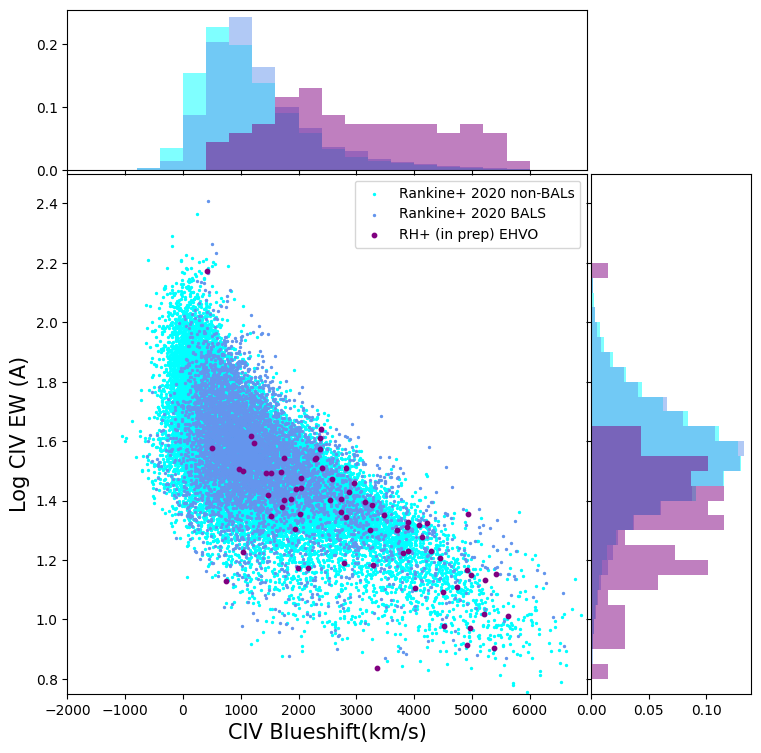

In [47]:
#Figure 2 DR16Q: (69 EHVOs)
figure_2(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),CivBlue_EHVOR,np.log10(CivEW_EHVOR),'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','RH+ (in prep) EHVO')

<ipython-input-48-b41062559d26>:2: RuntimeWarning: invalid value encountered in log10
  figure_plot(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),CivBlue_EHVO_combined,np.log10(CivEW_EHVO_combined), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)')


<Figure size 640x480 with 0 Axes>

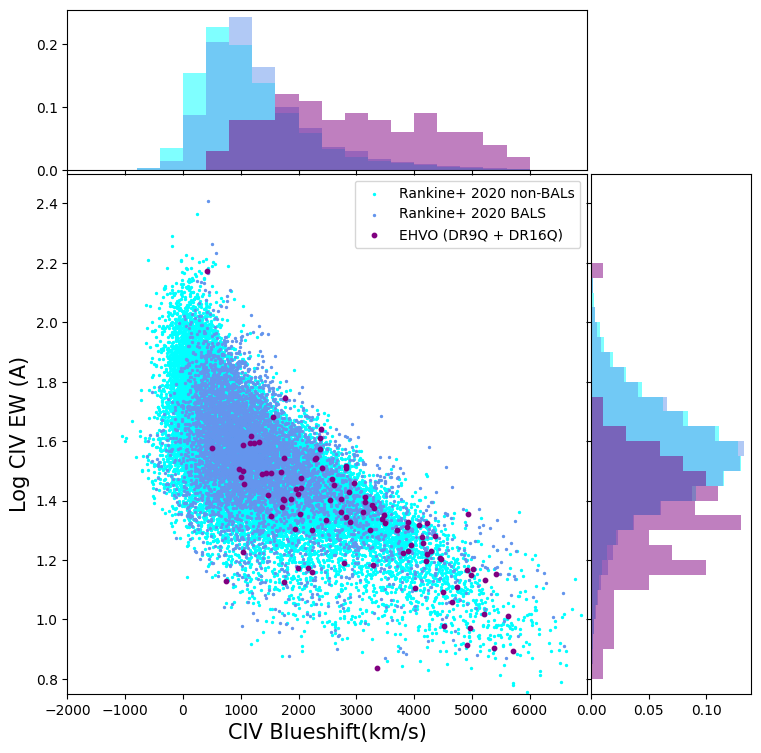

In [48]:
#Figure 2 DR16Q+DR9Q Combined (100 EHVOs)
figure_2(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),CivBlue_EHVO_combined,np.log10(CivEW_EHVO_combined), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)')

In [49]:
# Remove outlier
outlier = np.where(np.log10(CivEW_EHVOR)>2.1)
copyCivBlue = np.copy(CivBlue_EHVOR)
no_outlier_CivBlue = np.delete(copyCivBlue, [24])
copyCivEW = np.copy(CivEW_EHVOR)
no_outlier_CivEW = np.delete(copyCivEW, [24])
copyCivDist = np.copy(CivDist_EHVOR)
no_outlier_CivDist = np.delete(copyCivDist, [24])
copyHeiiEW = np.copy(HeiiEW_EHVOR)
no_outlier_HeiiEW = np.delete(copyHeiiEW, [24])

<ipython-input-50-555261383563>:2: RuntimeWarning: invalid value encountered in log10
  figure_plot(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),no_outlier_CivBlue,np.log10(no_outlier_CivEW),'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','RH+ (in prep) EHVO--outlier removed')


<Figure size 640x480 with 0 Axes>

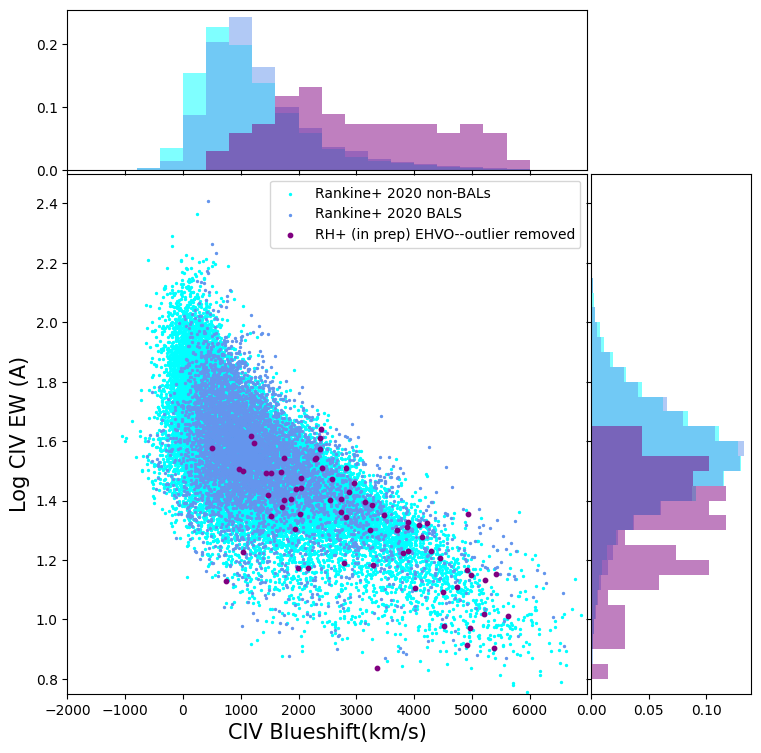

In [50]:
#Figure 2 DR16Q with outlier removed
figure_2(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),no_outlier_CivBlue,np.log10(no_outlier_CivEW),'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','RH+ (in prep) EHVO--outlier removed')

<Figure size 640x480 with 0 Axes>

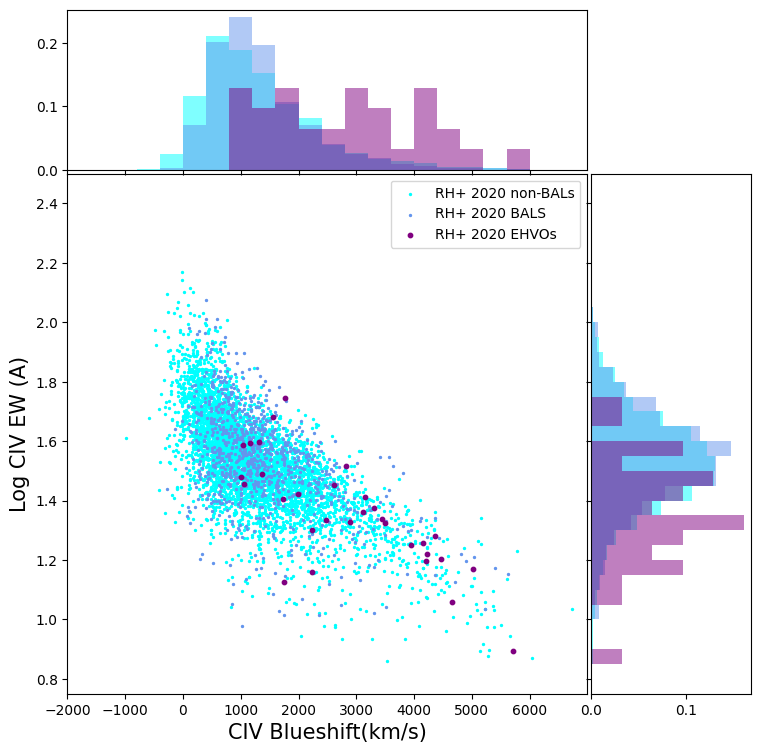

In [51]:
#Figure 2 using RH+ BALs and nonBALs and DR9Q EHVOs
figure_2(CivBlue_nonbal_9,np.log10(CivEW_nonbal_9),CivBlue_bal_9,np.log10(CivEW_bal_9),CivBlue_EHVOR_9,np.log10(CivEW_EHVOR_9),'RH+ 2020 non-BALs','RH+ 2020 BALS','RH+ 2020 EHVOs')

In [53]:
#combining 9 with 16 and remove outlier
CivBlue_EHVO_combined_noOut = np.concatenate((CivBlue_EHVOR_9, no_outlier_CivBlue))
CivEW_EHVO_combined_noOut = np.concatenate((CivEW_EHVOR_9, no_outlier_CivEW))
CivDist_EHVOR_combined_noOut = np.concatenate((CivDist_EHVOR_9, no_outlier_CivDist))
HeiiEW_EHVOR_combined_noOut = np.concatenate((HeiiEW_EHVOR_9, no_outlier_HeiiEW))

<ipython-input-56-938569e9cb2f>:2: RuntimeWarning: invalid value encountered in log10
  figure_plot(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),CivBlue_EHVO_combined_noOut,np.log10(CivEW_EHVO_combined_noOut), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)--outlier removed')


<Figure size 640x480 with 0 Axes>

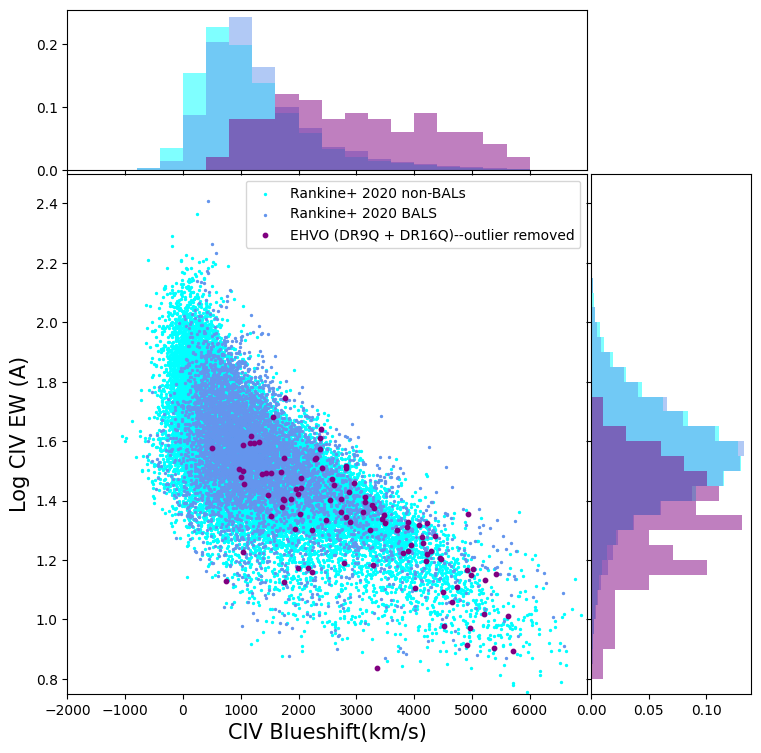

In [56]:
#Figure 2 DR16Q+DR9Q+outlier removed
figure_2(CivBlue_rankAll_nonbal,np.log10(CivEW_rankAll_nonbal),CivBlue_rankAll_bal,np.log10(CivEW_rankAll_bal),CivBlue_EHVO_combined_noOut,np.log10(CivEW_EHVO_combined_noOut), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)--outlier removed')

In [60]:
# Define Figure 5 Plotting Function
def scatter_hist_Heii(x, y, ax, ax_histx, ax_histy, color, area, mult, factor):
    ax_histx.tick_params(axis='x', labelbottom=False)
    ax_histy.tick_params(axis='y', labelleft=False)
    #the scatter plot:
    ax.set_xlim([0, 1.4])
    ax.set_ylim([-4, 1])
    ax.scatter(x, y, s = area, color = color)
    ax.text(10.5,0.5,'')
    ax.set_xlabel('CIV Distance', fontsize=15)
    ax.set_ylabel('Log HeII EW (A)', fontsize=15)
    binwidth_x = 0.05
    binwidth_y = 0.2
    upperlimx = 1.4
    lowerlimx = 0
    upperlimy = 1
    lowerlimy = -4
    binsx = np.arange(lowerlimx, upperlimx+binwidth_x, binwidth_x)
    binsy = np.arange(lowerlimy, upperlimy+binwidth_y, binwidth_y)

    if mult == 'yes':
        for i in range(0, factor):
            x = np.append(x,x)
            y = np.append(y,y)
        x = np.hstack(x)
        y = np.hstack(y)
    #kwargs = dict(histtype=‘stepfilled’, alpha=0.5, normed=True, bins=binsx)
    weightsx = [np.ones_like(x)/float(len(x))]
    weightsy = [np.ones_like(y)/float(len(y))]
    ax_histx.hist(x, bins = binsx, weights = weightsx, color = color, alpha = 0.5)
    ax_histy.hist(y, bins = binsy, weights = weightsy, orientation='horizontal', color=color, alpha = 0.5)

def figure_5(non_bal_dist, non_bal_HeEW, bal_dist, bal_HeEW, EHVO_dist, EHVO_HeEW, non_bal_Sample_Name, bal_Sample_Name, EHVO_Sample_name):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]
    fig = plt.figure(1)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    scatter_hist_Heii(non_bal_dist, non_bal_HeEW, ax, ax_histx, ax_histy ,'aqua', 1, 'no', 0)
    scatter_hist_Heii(bal_dist, bal_HeEW, ax, ax_histx, ax_histy,'cornflowerblue', 1, 'no', 0)
    scatter_hist_Heii(EHVO_dist, EHVO_HeEW, ax, ax_histx, ax_histy ,'purple', 20, 'no', 0)
    ax.legend([non_bal_Sample_Name,bal_Sample_Name,EHVO_Sample_name],loc='lower left')
    plt.show()
    plt.close()

<ipython-input-68-ae8c08797e10>:2: RuntimeWarning: divide by zero encountered in log10
  figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_combined_noOut,np.log10(HeiiEW_EHVOR_combined_noOut), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)--outlier removed')
<ipython-input-68-ae8c08797e10>:2: RuntimeWarning: invalid value encountered in log10
  figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_combined_noOut,np.log10(HeiiEW_EHVOR_combined_noOut), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)--outlier removed')


<Figure size 640x480 with 0 Axes>

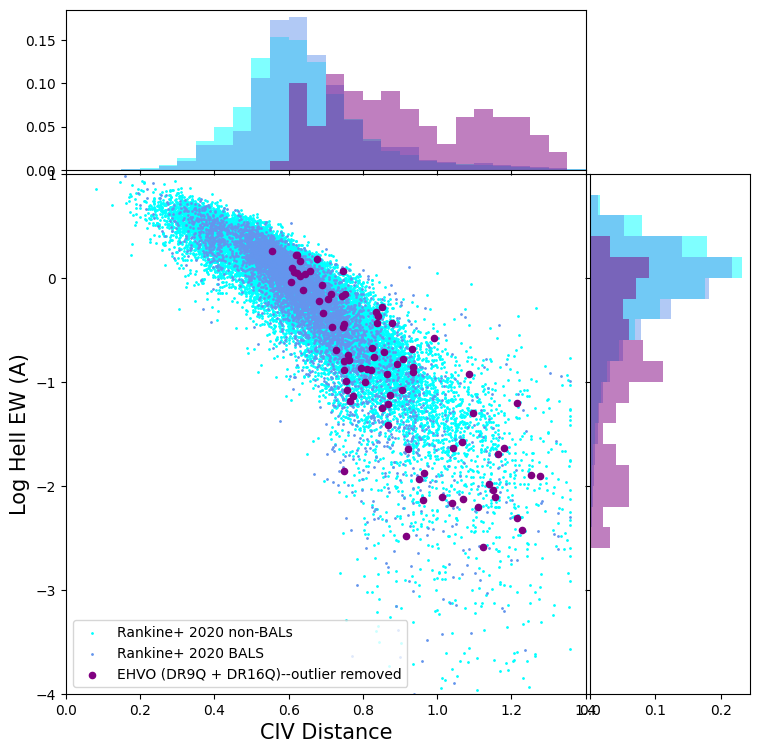

In [68]:
#Figure 5 DR9Q + DR16Q + Outlier Removed
figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_combined_noOut,np.log10(HeiiEW_EHVOR_combined_noOut), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)--outlier removed')

<ipython-input-69-3c8fb7b28b55>:2: RuntimeWarning: divide by zero encountered in log10
  figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_combined,np.log10(HeiiEW_EHVOR_combined), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)')
<ipython-input-69-3c8fb7b28b55>:2: RuntimeWarning: invalid value encountered in log10
  figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_combined,np.log10(HeiiEW_EHVOR_combined), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)')


<Figure size 640x480 with 0 Axes>

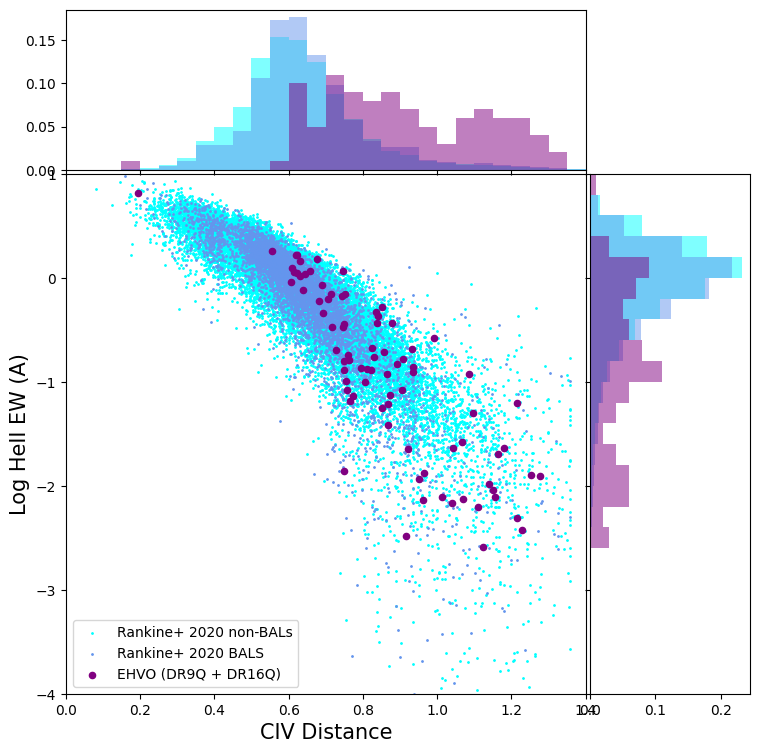

In [69]:
#Figure 5 DR9Q+ DR16Q Combined (100 EHVOs)
figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_combined,np.log10(HeiiEW_EHVOR_combined), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','EHVO (DR9Q + DR16Q)')

<ipython-input-70-68cdace7411e>:7: RuntimeWarning: divide by zero encountered in log10
  y3 = np.log10(HeIIEW_rankAll_nonbal)
<ipython-input-70-68cdace7411e>:7: RuntimeWarning: invalid value encountered in log10
  y3 = np.log10(HeIIEW_rankAll_nonbal)
<ipython-input-70-68cdace7411e>:8: RuntimeWarning: invalid value encountered in log10
  y2 = np.log10(HeiiEW_EHVOR_9)
<ipython-input-70-68cdace7411e>:9: RuntimeWarning: divide by zero encountered in log10
  y4 = np.log10(HeIIEW_rankAll_bal)
<ipython-input-70-68cdace7411e>:9: RuntimeWarning: invalid value encountered in log10
  y4 = np.log10(HeIIEW_rankAll_bal)
<ipython-input-70-68cdace7411e>:10: RuntimeWarning: divide by zero encountered in log10
  figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_9,np.log10(HeiiEW_EHVOR_9), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','RH+2020 EHVOs')
<ipython-input-70-68cdace7411e>:10: RuntimeWarning: invalid value enco

<Figure size 640x480 with 0 Axes>

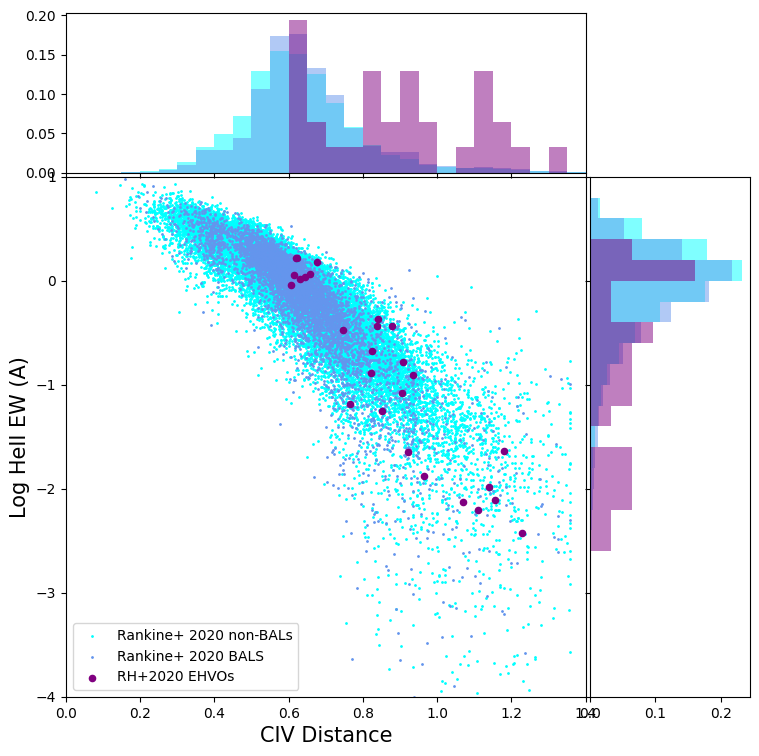

In [70]:
#Figure 5 DR9Q (31 EHVOs)
figure_5(CivDistance_rankAll_nonbal,np.log10(HeIIEW_rankAll_nonbal),CivDistance_rankAll_bal,np.log10(HeIIEW_rankAll_bal),CivDist_EHVOR_9,np.log10(HeiiEW_EHVOR_9), 'Rankine+ 2020 non-BALs','Rankine+ 2020 BALS','RH+2020 EHVOs')

In [77]:
# define Figure 1 plotting function
def scatter_CivBlue_EW(x, y, ax, color, area, factor):
    ax.set_xlim([-2000, 7000])
    ax.set_ylim([0.7, 2.5])
    ax.scatter(x, y, s = area, color = color)
    ax.text(10.5,0.5,'')
    ax.set_xlabel('CIV Blueshift (km/s)', fontsize=15)
    ax.set_ylabel('Log CIV EW \u212B', fontsize=15)
def figure_1(Blue_rankAll_good,EW_rankAll_good,Blue_rankAll_SNR,EW_rankAll_SNR,Blue_RH_parent,EW_RH_parent,rankAll_sample_name,rankAll_SNR_sample_name,RH_parent_sample_name):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005
    rect_scatter = [left, bottom, width, height]
    fig = plt.figure(1)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    scatter_CivBlue_EW(Blue_rankAll_good,EW_rankAll_good,ax, 'grey', 2, 0)
    scatter_CivBlue_EW(Blue_rankAll_SNR,EW_rankAll_SNR,ax,'cornflowerblue', 2, 0)
    scatter_CivBlue_EW(Blue_RH_parent,EW_RH_parent,ax, 'purple', 2, 0)
    ax.legend([rankAll_sample_name,rankAll_SNR_sample_name,RH_parent_sample_name],loc='upper right')
    plt.show()
    plt.close()

<ipython-input-78-4c045aa48f99>:2: RuntimeWarning: invalid value encountered in log10
  figure_1(CivBlue_rankAll_good,np.log10(CivEW_rankAll_good),CivBlue_rankAll_SNR,np.log10(CivEW_rankAll_SNR),CivBlue_parentR,np.log10(CivEW_parentR),'Rankine+ 2020 all','Rankine+ S/N>10','RH+ in prep')


<Figure size 640x480 with 0 Axes>

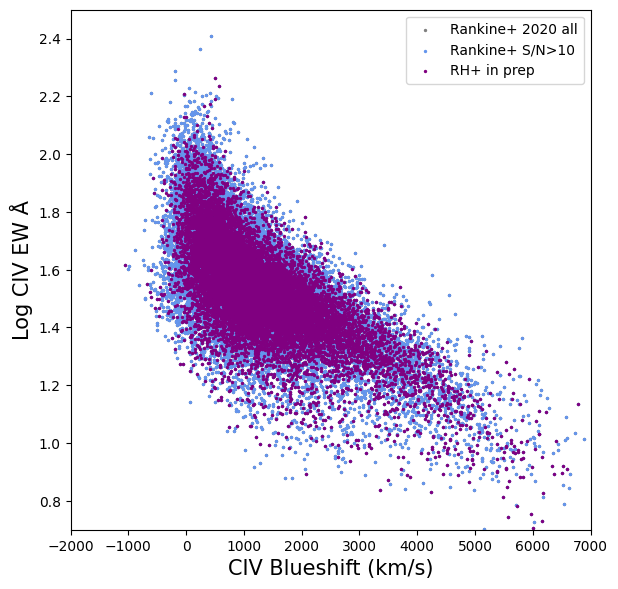

In [78]:
#Figure 1 DR16Q
figure_1(CivBlue_rankAll_good,np.log10(CivEW_rankAll_good),CivBlue_rankAll_SNR,np.log10(CivEW_rankAll_SNR),CivBlue_parentR,np.log10(CivEW_parentR),'Rankine+ 2020 all','Rankine+ S/N>10','RH+ in prep')

<ipython-input-80-4e7a7fc942d3>:2: RuntimeWarning: invalid value encountered in log10
  figure_1(CivBlue_rankAll_good,np.log10(CivEW_rankAll_good),CivBlue_rankAll_SNR,np.log10(CivEW_rankAll_SNR),CivBlue_parentR_9,np.log10(CivEW_parentR_9),'Rankine+ 2020 all','Rankine+ S/N>10','RH+2020')


<Figure size 640x480 with 0 Axes>

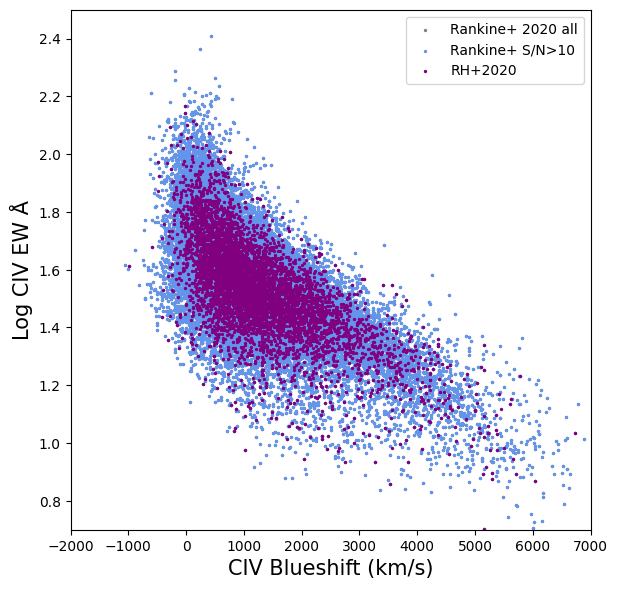

In [80]:
#Figure 1 DR9Q
figure_1(CivBlue_rankAll_good,np.log10(CivEW_rankAll_good),CivBlue_rankAll_SNR,np.log10(CivEW_rankAll_SNR),CivBlue_parentR_9,np.log10(CivEW_parentR_9),'Rankine+ 2020 all','Rankine+ S/N>10','RH+2020')